The code for plotting warming stripes is adapted from [Sebastian Beyer's github repository](https://github.com/sebastianbeyer/warmingstripes)

In [34]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
obs_file = '../data/raw/obs_temp_data/combined_temps_Jan_2019.csv'
models_file = '../data/raw/model_temp_data/Model timeseries.xlsx'

In [63]:
obs_df = pd.read_csv(obs_file)
obs_ds = obs_df.to_xarray().swap_dims({'index': 'year'}).groupby('year').mean()
obs_ds['mean'] = (obs_ds['hadcrut4'] + obs_ds['gistemp'] + obs_ds['noaa'] + obs_ds['berkeley'] + obs_ds['cowtan_way'])/5.

models_df = pd.read_excel(models_file, sheet_name = 'Individual papers')
models_df.columns = map(str.lower, models_df.columns)
models_ds = models_df.to_xarray().swap_dims({'index': 'year'})

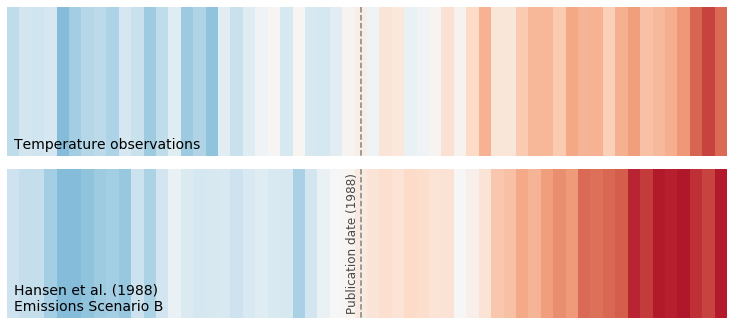

In [186]:
vmin = -1.0
vmax = 1.0

timeslice = slice(1960,2017)
meanslice = slice(1978,1998)

plt.figure(figsize=(10,4.5))

plt.subplot(2,1,1)

temp_to_stack = (
    obs_ds['mean'].sel(year=timeslice) -
    obs_ds['mean'].sel(year=meanslice).mean(dim='year')
).values
stacked_temps = np.stack([temp_to_stack, temp_to_stack],axis=0)
img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=6, vmin=vmin, vmax=vmax)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.plot([1988-1960,1988-1960], [-0.5,1.5],'--', color = 'grey')
plt.annotate(s='Temperature observations', xy=(0.01, 0.05),xycoords='axes fraction', fontsize = 14, color = 'black')

plt.subplot(2,1,2)

temp_to_stack = (
    models_ds['hansen_1988_b_t'].sel(year=timeslice) -
    models_ds['hansen_1988_b_t'].sel(year=meanslice).mean(dim='year')
).values
stacked_temps = np.stack([temp_to_stack, temp_to_stack],axis=0)
img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=6, vmin=vmin, vmax=vmax)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())


plt.annotate(s='Hansen et al. (1988)\nEmissions Scenario B', xy=(0.01, 0.05),xycoords='axes fraction', fontsize = 14, color = 'black')
plt.plot([1988-1960,1988-1960], [-0.5,1.5],'--', color = 'grey')

plt.annotate(s='Publication date (1988)', xy=(1988-1960-1.2, 1.4),xycoords='data', fontsize = 12, color = 'black', rotation=90, alpha=0.7)

plt.savefig("extra_figures/projectionstripes.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)